# Bar charts

In [1]:
# %%%%%%%% imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_misc.barchart as barchart
import plot_misc.example_data.examples as examples
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator
%matplotlib inline

/home/amand/google_drive/Research/plot-misc/plot_misc/table/layout.py:22: FutureWarning: The `layout.py` module will be moved to the `clean-datapackage in the near future.
  warnings.warn('The `layout.py` module will be moved to the `clean-data'


In [2]:
# import example data
table = examples.load_barchart_data()
table = table.T

# constants
COLOURS = ['red', 'green', 'orange']
EDGECOLOUR = 'black'
TICKS_WD = 0.6
CMTOINCH = 1/2.54
LABELS = 'labels'

# Adding the index as a column
table['labels'] = table.index
table=table.loc[['Heart failure', 'HCM', 'DCM', 'Non-ischemic CM', 'AF']]

# show table
table.head()

cardiac_chambers  LA  LV  RV           labels
Heart failure      3   6   3    Heart failure
HCM                0   4   4              HCM
DCM                1   6   3              DCM
Non-ischemic CM    0   5   3  Non-ischemic CM
AF                 4   5   2               AF

## Stacked barchart 

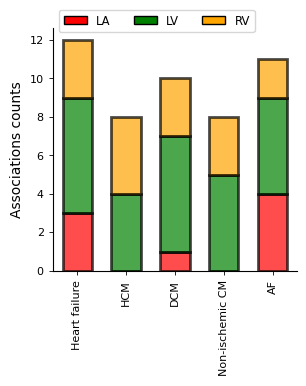

In [3]:
### figure
fig,  ax = plt.subplots(figsize=(8 * CMTOINCH, 8 *CMTOINCH),
                        nrows=1, sharex=True, sharey=False)
ax = barchart.stack_bar(table, label=LABELS, columns=table.columns[:-1].to_list(),
                        wd=0.6, edgecolor=EDGECOLOUR, colours=COLOURS, ax=ax,
                        **{'linewidth':2}
                        )
### formatting
# x-axis
ax.set_xlim(-0.5,table.shape[0]-0.5)
# labels and ticks
ax.tick_params(axis="x", labelsize=8.0, length=3, width=TICKS_WD, rotation=90)
ax.tick_params(axis="y", labelsize=8.0, length=3, width=TICKS_WD, rotation=0)
# only integer
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# remove labels
ax.set_ylabel('Associations counts')
ax.set_xlabel('')
# legend
cmap = dict(zip(list(table.columns[:-1]), COLOURS))
patches = [Patch(facecolor=v, label=k, edgecolor=EDGECOLOUR) for k, v in cmap.items()]
ax.legend(handles=patches , ncol=3, bbox_to_anchor=(0.85, 1.10),
          fancybox=True, shadow=False, fontsize='small', markerscale=0.6,
          )

In [4]:
help(barchart)

Help on module plot_misc.barchart in plot_misc:

NAME
    plot_misc.barchart - A collection of various bar chart functions, based on matplotlib.

FUNCTIONS
    bar(df: pandas.core.frame.DataFrame, label: str, column: str, ax: matplotlib.axes._axes.Axes, colours: List[str] = ['tab:blue', 'tab:pink'], transparancy: float = 0.7, wd: float = 1, edgecolor: str = 'black', **kwargs: Optional[Any]) -> matplotlib.axes._axes.Axes
        Plot a barchart with sequentially coloured bars.

        Arguments
        ---------
        df : pd.DF
        label : str
            The column name with the axes labels you want to use.
        column : str
            The column name with the (y-axis) values (floats/int) that need to be
            plotted.
        colours : list
            A list of colours, can be a single or multiple values (will get
            recycled).
        colours : str
            A list of colours of the bars.
        transparancy : str, default 0.7
            For the alpha 